# 3. Exprolatory Data Analysis (EDA)
<목적>

Machine learning model로 분석하기 전, target variable에 관계성이 있는 variable을 선정해서 향후 model prediction을 향상시키기 위함

<정리>
* Categorical variable: 시각화: boxplot --> 분석: ANOVA
* Numeric variable : 시각화: scatterplot&fitted line  -->  분석: Pearson correlation

In [9]:
import pandas as pd
import numpy as np
route = "C:/Users/sori-/Downloads/automobileEDA.csv"
car = pd.read_csv(route)
car.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyze Individual Feature using Visualization

In [45]:
# seaborn 설치하기
%%capture
! pip install seaborn

UsageError: Line magic function `%%capture` not found.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline     # Jupiter NB에 plotting하기 위해서 필요함

In [48]:
# correlation efficient 구하기
car.corr()  # int와 float 컬럼에 대해서만 구해짐

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [49]:
# 특정 컬럼에 대해서만 관계성 확인
car[['bore', 'stroke', 'compression-ratio', 'price']].corr()

,bore,stroke,compression-ratio,price
bore,1.000000,-0.055390,0.001263,0.543155
stroke,-0.055390,1.000000,0.187923,0.082310
compression-ratio,0.001263,0.187923,1.000000,0.071107
price,0.543155,0.082310,0.071107,1.000000


## Categorical Variables
data type: object, category, int64

시각화 : boxplot

In [ ]:
# body-style과 price 관계성
sns.boxplot('body-style', 'price', data=car)

Text(0, 0.5, 'price of car')

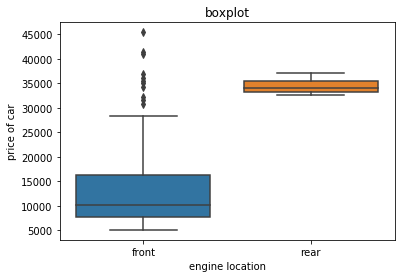

In [50]:
# engine-location과 price 관계성
sns.boxplot('engine-location', 'price', data=car)
import matplotlib.pyplot as plt     # 제목, label 넣고 싶을 때
# %matplotlib inline
plt.title('boxplot')
plt.xlabel('engine location')
plt.ylabel('price of car')

In [ ]:
# drive-wheels과 price의 관계
sns.boxplot(x='drive-wheels', y='price', data=car)

## Continuous Numerical Variables
int or float 타입

시각화 방법: scatterplot & fitted lines  -->  regplot

In [ ]:
# Engine-size와 price 관계성
sns.regplot(x='engine-size', y='price', data=car)    # scatterplot & regression line
plt.ylim(0,)     # y축 범위 지정

In [ ]:
# Engine-size와 price의 correlation efficient 값과 비교
car[['engine-size', 'price']].corr()

In [ ]:
# Highway-mpg와 price의 관계성
sns.regplot(car['highway-mpg'], car['price'], data=car)

In [ ]:
# coefficient
car[['highway-mpg', 'price']].corr()

In [ ]:
# Peak-rpm과 price의 관계성
sns.regplot('peak-rpm', 'price', data=car)

In [ ]:
# coefficient
car[['peak-rpm', 'price']].corr()

## Descriptive Statistics
describe() : NaN과 object type은 자동으로 거르고 산출함

value_counts()

In [ ]:
car.describe()

In [ ]:
# obeject type도 포함시키기
car.describe(include='all')
# 또는 object 통계만 보려면
car.describe(include=['object'])

## Value Counts
Pandas series(컬럼 한줄)에만 작용함. Dataframe에 적용 안됨  -->  [] bracket 하나 사용!!

In [ ]:
type(car['drive-wheels'])     # pandas series, 줄로 보임
type(car[['drive-wheels']])   # pandas dataframe, 표로 보임

In [ ]:
counts = car['drive-wheels'].value_counts()               # series에 적용
counts = car['drive-wheels'].value_counts().to_frame()    # dataframe으로 바꿈
counts.rename(columns={'drive-wheels':'value-counts'}, inplace=True)
counts.index.name = 'drive-wheels'    # column 이름이 아니라, index 위에 이름 붙여줌 
counts

In [ ]:
# Engine-location에도 해보기
e_counts = car['engine-location'].value_counts().to_frame()
e_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
e_counts.index.name = 'engine-location'
e_counts      # 한쪽 카테고리에 값이 몰려있어서 good predictor 아님

## GroupBy in Python
pivot table : 열에 하나의 variable, 행에 하나의 variable이 들어감  -->  Excel spreadsheet과 유사  -->  pivot()

Heatmap : pivot table을 시각화하기에 적당함

In [ ]:
# decrive()에서의 unique값 불러오기
car['drive-wheels'].unique()

In [ ]:
# drive-wheels, body-style, price를 비교하기
group = car[['drive-wheels', 'price', 'body-style']]
group

In [ ]:
# Grouping 하기
group1 = group.groupby(['drive-wheels'], as_index=False).mean()
group1     # body-style은 numeric variable이 아니라 평균을 못구해서 알아서 price만 나온것

In [ ]:
group2 = group.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
group2

In [ ]:
pivot = group2.pivot(index='drive-wheels', columns='body-style')
pivot

In [ ]:
# NaN값을 0으로 채우기
group3 = pivot.fillna(0)
group3

In [ ]:
# 3개 이상의 표인 경우 궁금해서 해봄
a = car[['drive-wheels', 'num-of-doors', 'body-style', 'horsepower', 'price']]
b = a.groupby(['drive-wheels', 'num-of-doors', 'body-style'], as_index=False).mean()
b
c = b.pivot(index='body-style', columns='drive-wheels')
c

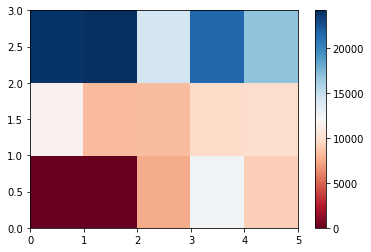

In [53]:
# heatmap으로 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.pcolor(group3, cmap='RdBu')     # pseudocolor plot 생성
plt.colorbar()                      # bar 생성
plt.show()                          # 윗줄 지우고 display용으로 전환

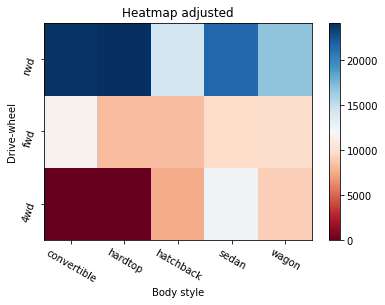

In [54]:
# label 바꾸기
fig, ax = plt.subplots()              # 틀 만들기
im = ax.pcolor(group3, cmap='RdBu')   # 위 이미지 넣기

# Label할 이름 가져오기
row_labels = group3.columns.levels[1]  # levels[0]: price값을 가져옴
row_labels
col_labels = group3.index
col_labels

# tick(눈금)과 lable을 중앙으로 옮기기
# np.arange는 주어진 구간에서 일정하게 나눠진 값을 찾는 것
# integer에서는 np.arange, float에서는 np.linspace 추천
ax.set_xticks(np.arange(group3.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(group3.shape[0])+0.5, minor=False)

# label 이름을 집어넣기
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# label이 긴 경우 세로로 회전시킴
plt.xticks(rotation=-30)
plt.yticks(rotation=72)

# 축이름 집어넣기
plt.xlabel('Body style')
plt.ylabel('Drive-wheel')
plt.title('Heatmap adjusted')

# color 넣기
fig.colorbar(im)
plt.show()                  

## ANalysis Of VAriance (ANOVA)
하나의 independent variable안의 group간에 dependent variable 값 평균의 차이가 큰지 확인하는 통계법

그룹간의 차이를 분석하기 때문에 groupby()이 편리함 
* <b>F-test score</b> : 모든 그룹의 평균이 같다고 가정하고, 실제 평균이 이 가정으로부터 얼마나 벗어났는지를 측정 
  
  --> 공식: (variance of group means) / (variance in sample group)
    
    ==> <b>F가 크면, variable category와 target variable간의 correlation이 크다는 뜻!</b>
    
* <b>p-value</b> : statistically significant한지 보여줌 ==> <b>Null hypothesis가 그룹간 평균이 같다이기 때문에, p-values는 작을수록 좋음</b>

In [ ]:
# Drive-wheels와 price 사이의 ANOVA
group4 = car[['drive-wheels', 'price']].groupby(['drive-wheels'])
group4.head(2)     # 각 그룹의 제일 위 2줄만 가져옴

In [ ]:
# 그룹에 속한 값 가져오기
group4.get_group('4wd')['price']
group4.get_group('4wd')

In [ ]:
# ANOVA의 f-test와 p-value 구하기 - f_oneway
f, p = stats.f_oneway(group4.get_group('fwd')['price'], group4.get_group('4wd')['price'], group4.get_group('rwd')['price'])
f, p               # statistically significant strong correlation
# 하지만 3개 다 관련성이 높은지는 불확실???

In [ ]:
# 4wd와 rwd와의 관계만 보기
f, p = stats.f_oneway(group4.get_group('4wd')['price'], group4.get_group('rwd')['price'])
f, p           # statistically significant but not much correlation

In [ ]:
# 4wd와 fwd와의 관계만 보기
f, p = stats.f_oneway(group4.get_group('4wd')['price'], group4.get_group('fwd')['price'])
f, p           # not statistically significant and no correlation

In [ ]:
# fwd와 rwd와의 관계만 보기
f, p = stats.f_oneway(group4.get_group('fwd')['price'], group4.get_group('rwd')['price'])
f, p           # statistically significant and much correlation

## Correlation
Correlation이 causation과는 관련이 없다!
* Regression line : 두 변수의 relationship을 보여주는 선

## Pearson Correlation
연속적인 numerical variables 간의 correlation을 보여줌

X와 Y 사이의 linear dependence를 측정(1차 함수)

.corr()해서 나오는 값을 구하는게 Pearson correlation 방법
* <b>Correlation coefficient</b> : 1에 가까우면 large positive relationship, -1에 가까우면 large negative relationship, 0이면 관계없음
* <b>p-value</b> : Null hypothesis는 상관관계가 없다 -->  작을수록 좋음

In [ ]:
car.corr().head()

In [ ]:
# 라이브러리 불러오기 - Scipy
from scipy import stats

In [1]:
# coefficient(위에서 표로 구한것과 같음)와 p-value 구하기
c, v = stats.pearsonr(car['wheel-base'], car['price'])
c, v      # statistically significant moderate correlation

NameError: name 'stats' is not defined

In [ ]:
# Horsepower와 price의 관계성
c, v = stats.pearsonr(car['horsepower'], car['price'])
c, v      # statistically signifiant strong correlation

In [ ]:
# Length와 price 관계성
c, v = stats.pearsonr(car['price'], car['length'])
c, v      # statistically significant moderate correlation

In [ ]:
# Width와 price
c, v = stats.pearsonr(car['price'], car['width'])
c, v      # statistically significant storong correlation

In [ ]:
# Curb-weight와 price
c, v = stats.pearsonr(car['price'], car['curb-weight'])
c, v      # statistically significant strong correlation

In [ ]:
# Engine-size와 price
c, v = stats.pearsonr(car['price'], car['engine-size'])
c, v      # statistically significant strong correlation

In [ ]:
# Bore와 price
c, v = stats.pearsonr(car['price'], car['bore'])
c, v      # statistically significant moderate correlation

In [ ]:
# City-mpg와 price
c, v = stats.pearsonr(car['price'], car['city-mpg'])
c, v      # statistically significant negatively moderate correlation

In [ ]:
# Highway-mpg와 price
c, v = stats.pearsonr(car['price'], car['highway-mpg'])
c, v      # statistically significant negatively strong correlation